# In-Class Tutorial for SVM

In this tutorial, we'll learn about SVMs! 

SVMs, or **Support Vector Machines**, are advanced supervised machine learning models used for classification and/or regression.

Here, we'll be talking primarily about classification using SVMs. 

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

from scipy import stats

from sklearn.datasets.samples_generator import make_blobs, make_circles
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from ipywidgets import interact, fixed
from mpl_toolkits import mplot3d

## How do we classify these data? 

Let's create some blobs using some internal library methods to test out the functionality of SVM Classifiers!

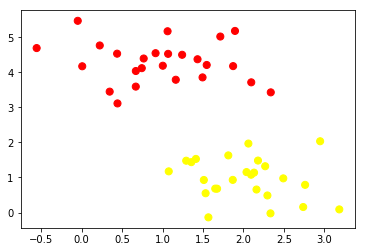

In [209]:
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn")

## Wait... which decision boundary is right? Why? 

How do we know that our decision boundary calculation is fitting to the best possible location? 

In other words, **how can we optimize** our decision boundary? 

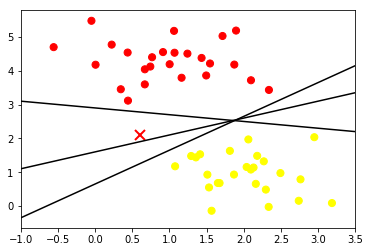

In [210]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

The red X is showing our best fit, but obviously we can write some unstable MatPlotLib code every time we want to run an SVM... *especially* not for larger datasets! 

Let's talk about our **minimization-maximization algorithm** (a.k.a. the *seesaw*!). 

## An Algorithm that Minimizes Misclassification while Maximizing the Decision Margin!

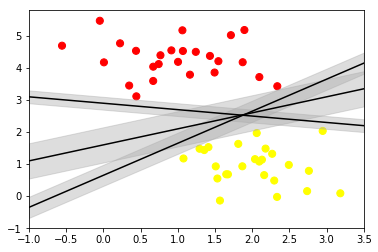

In [211]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

Our **min-max algorithm** allows us to simulate our *margin*, which is indicative of the optimizer. 

In other words, this allows us to see the best fit linear model, since the best fit is where the *distance between the decision boundary and our support vectors* is **maximized** and the *ratio of misclassified to correctly classified data* is **minimized**. 

## Let's initialize our Support Vector Machine Classifier. 

Enough talk!

Let's dive right into some cool code! 

At this point, you should roughly know how to initialize ML models and fit data to them. 

SVMs are no different, save some particular parameters.

For now, let's leave that second line of code *commented out*. Trust me on this one. 

In [212]:
svc_model = SVC()
# svc_model = SVC(kernel="linear", C=1E10)
svc_model.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Wow, those are a **lot** of parameters. 

---

Sometimes, I like to imagine a machine learning model as a big family. 

The algorithms underlying the machine learning model, like our minimization-maximization algorithm, are the parents and guardians, bringing order, functionality, and stability to our model. 

Without them, our model simply wouldn't work. 

Then I imagine the parameters of our model, like our *kernel* and *C* arguments commented out above, are the little kids of the family, bringing an element of fun, creativity, and flexibility to our model that, if left unchecked, could result in chaos, destruction, and the end of all things as we know it. 

And that's why we call those parameters **hyperparameters**!

---

Let's see how those hyperparameters affect our model, shall we? 

## Let's write a function to plot our SVC decision boundary function. 

Don't worry about exactly how and why all this is working!

This is some handy dandy little MatPlotLib code to plot our decision boundary function with our simulated margins.

This time, rather than shading in the margin region, we're simply going to denote the margin boundaries with dotted lines. 

In [213]:
def plot_svc_decision_function(model=svc_model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

## Let's plot our margin and decision boundary. What went wrong? 

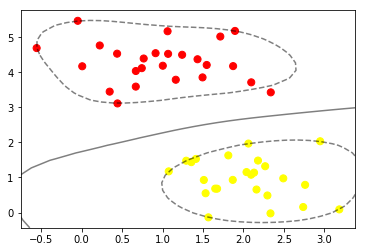

In [214]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model=svc_model);

Hmm, that's not quite what we expected. 

What could have gone wrong? 

If you're wondering why our dotted lines are now surrounding our data clusters without abiding by a linear decision function, you should ask yourself: *how does our SVM know to use a linear boundary function*? 

Short answer? **It doesn't**. 

Long answer? The `SVC()` class defaults to thinking that the ideal kernel is a *radial basis function*, which approximates a circular boundary function. 

We certainly don't want that; we only want a simple line dividing our data clusters. 

That's why we have to tell it! 

---

Let's go back up to our cell where we *initialize our SVM Classifier* and *fit the model to our data*. 

Now, **comment the empty initialized SVC()** out and **uncomment the second SVC() initializing line**.

Run that cell and then run the cell above. See any changes? 

;-)

## Let's write a function that plots our margin and SVC decision boundary.

Now that we've played around with initializing and fitting our SVM classifier to our dummy data, let's take a quick aside to see how our data actually affects our classifier. 

This is a *critical concept*, since we as data scientists want to understand why we'd use one model over another down to the very data structures entering and exiting our models. 

What actually separates SVMs from other models? 

Why use it? 

Let's find out! 

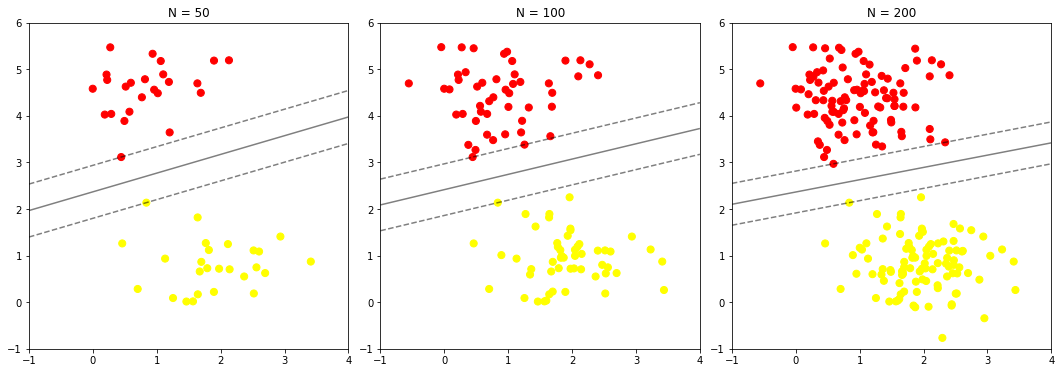

In [217]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    svc_model = SVC(kernel="linear", C=1E10)
    svc_model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn")
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(svc_model, ax)

fig, ax = plt.subplots(1, 3, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [50, 100, 200]):
    plot_svm(N, axi)
    axi.set_title("N = {0}".format(N))

In our example here, we've just plotted three data clusters of similar distributions fitted by SVM Classifiers, but with one critical difference. 

Our first plot contains only half as many points as the second plot (or, the second plot contains exactly double the points as the first plot - whatever suits your fancy). 

Likewise for the second and third plots.  

However, even though we're *doubling* our data each time, we're barely making a dent in our model's fitness. Why?

...

Want to know the answer?

It's because the model doesn't fit the decision boundary to all data points, but rather fits the decision boundary to the support vectors. As you can see, the intersected support vector count doesn't change dramatically across any plot, even though we're dramatically changing the number of data values included. 

This is **super important**. 

SVMs are so nice because rather than storing every data point in memory to measure against every other data point (I'm looking at you, *k-Nearest Neighbors* algorithms), they only need the relative Euclidean metrics for the support vectors to approximate the decision boundary. 

# Do SVCs work for non-linearly distributed data? 

Now, we can spend all day using SVMs to draw lines, but let's be honest. 

Any one and their mother's rudimentary CS 101 algorithms can probably effectively divide up data based on label. 

However, the magic of SVMs lie in another algorithm that runs under the hood: the **kernel function**. 

The kernel we specify to our SVM Classifier allows the machine to understand the approximate distribution of data, where to draw support vectors, and how to wrap our data to better achieve an optimal approximation for linear separability. 

Let's explore this concept through failure: *let's fit a linear SVM classifier to a non-linear data distribution*. 

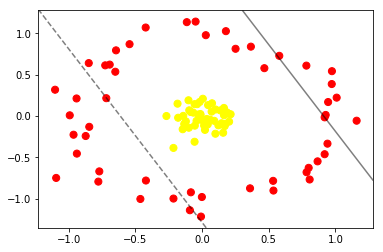

In [226]:
X, y = make_circles(100, factor=0.1, noise=0.1)

clf_svc_bad = SVC(kernel="linear")
clf_svc_bad.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn")
plot_svc_decision_function(clf_svc_bad, plot_support=False);

Eugh. Pretty abysmal, right? 

In fact, try running it a few times. Each time, the data is only very slightly shifted randomly, but with completely different approximations for the linear decision boundary. 

Obviously, this is because the data distribution is *non-linear*. 

How do we tell that to the SVM? 

We do that through the **kernel function** - by instructing the SVM that the data takes a certain distribution that requires transforming the way we *look at the data*. 

That's a very important point to make: the kernel function *does not* transform our data.

Rather, it changes the way we look at it through the arithmetic transfiguration of dimensions in order to better calculate a mechanism to linearly separate our data.

Let's check that out by visualizing a unique kernel function for our sample data.

## Let's change our kernel function to see what other dimensional ways there are to separate our classes.

In [227]:
rbf = np.exp(-(X ** 2).sum(1))

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:, 0], X[:, 1], rbf, c=y, s=50, cmap="autumn")
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("rbf")

Just a lot of weird MatPlotLib - trust me, you don't need to know how or why this works. 

Only that it works!

Now that we have our 3-dimensional visualization function, let's see it in action! 

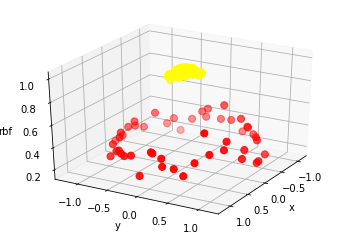

In [228]:
interact(plot_3D, elev=[0, 30], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

Pretty cool, right? 

Here, we can clearly see that despite the data distribution hasn't changed with regard to our core X features, our added dimension allows us to better see a linear function (to be precise, a *plane*) that can separate our data. 

---

In terms of the Support Vector Machine, this exact relationship in converting our data's dimensional frame of reference can be described by a specific kernel function called the **radial basis function**. 

## We can use the _Radial Basis Function_ to better model our data.

Let's invoke the *radial basis function* as our kernel function for our Support Vector Machine classifier. 

In [229]:
clf_svc_good = SVC(kernel="rbf", C=1E6)
clf_svc_good.fit(X, y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Now that we've fit our data to our classifier model, let's visualize how the kernel trick allows us to achieve linear separation via our 3D hyperplane. 

## Using the RBF, we can see how the extra dimension impacts the shape of our decision boundary.

Particularly, when we use our MatPlotlib utilities to visualize our decision boundary, we can see how the classifer model's accuracy is now vastly improved due to the shape of our data.

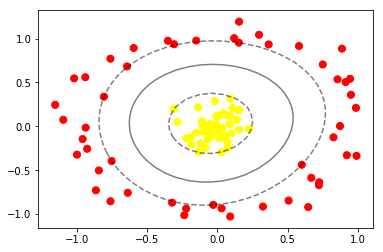

In [222]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn")
plot_svc_decision_function(clf_svc_good)
plt.scatter(clf_svc_good.support_vectors_[:, 0], clf_svc_good.support_vectors_[:, 1],
            s=300, lw=1, facecolors="none");

## What happens when we have data that's not perfectly linearly separable? 

We've spent plenty of time with our ideal case, but let's be real - most data we deal with in the real world isn't going to be perfectly linearly separable.

Rather, much of the data is likely to have *overlap*. We call this **linear non-separability**. 

Let's throw some dummy data out there to better understand this. 

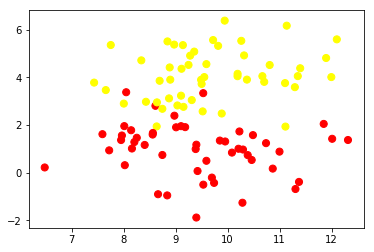

In [223]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=4, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn");

We can definitely see that our data isn't as linearly separable as we want! 

To be precise, there is no specific linear function in our current frame of reference that can perfectly separate all our data into two groups. 

---

When our data isn't ideal, we can use **hyperparameter tuning** to optimize our model to achieve a maximized predictive score for our model across our data. 

Let's start with our C-parameter, which is used for *hardening* and *softening* our decision boundary margin. 

## Tuning our C-parameter to 'harden' or 'soften' our margins.

Using the power of MatPlotLib, we can manipulate the C-parameter to affect our margin. 

To be more precise, the more C-parameter increases, the harsher data points are *penalized* for being contained within the boundaries of the decision margin. 

Likewise, the more C-parameter decreases, the easier it is for data points to be contained within the decision margin. 

We can see this depicted with the visualizations below!

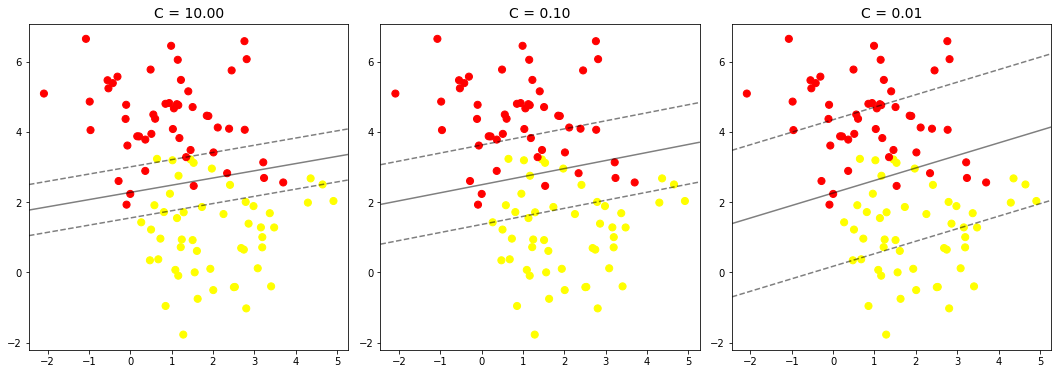

In [232]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)

fig, ax = plt.subplots(1, 3, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1, 0.01]):
    clf_svc_tuned = SVC(kernel="linear", C=C)
    clf_svc_tuned.fit(X, y)
    
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn")
    plot_svc_decision_function(clf_svc_tuned, axi)
    axi.scatter(clf_svc_tuned.support_vectors_[:, 0],
                clf_svc_tuned.support_vectors_[:, 1],
                s=300, lw=1, facecolors="none");
    axi.set_title("C = {:.2f}".format(C), size=14)

As we can see, there's quite a bit to unpack with Support Vector Machine Classifiers.

Including hyperparameter tuning, model fitness, and kernel function initialization, there's a few critical factors to ensuring that our SVM model works optimally.

---

In order to wrap up our understanding of SVMs, let's tackle a coding example of applying an SVM classifier to some data you may be familiar with: **the Iris Dataset**. 

# SVM Classification using the Iris Dataset.

---

For our SVM classification for the Iris data, we start by initializing our dataset and target variable vector. 

In [28]:
data = load_iris()
print(data.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

## Let's play with Parameter Tuning! 

- **kernel**: ("linear", "rbf")
<br>Changes the _linear transformation function_ to fit around our data (decision boundary function).<br><br>

- **C**:      (0, inf)
<br>Controls trade-off between _smooth decision boundary_ and _minimizing training misclassification_.<br><br>

- **gamma**:  (0, inf)
<br>Kernel coefficient; controls _'fitness'_ of model to training data.

We've already played a little with hyperparameter tuning, but now let's take it to the next level.

We can combine our knowledge of Python programming with our newfound skills in machine learning to construct several different models with varying levels of hyperparameterization to identify the optimal model setup.

Let's functionalize that below. 

In [71]:
def svc_iris_classifier(iris, kernel="linear", C=1.0, gamma="auto"):
    X, y = iris.data[:, :2], iris.target

    clf_svc_iris = SVC(kernel=kernel, C=C, gamma=gamma)
    clf_svc_iris.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    h = (x_max / x_min) / 100

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    plt.subplot(1, 1, 1)
    Z = clf_svc_iris.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.BuGn_r)
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.xlim(xx.min(), xx.max())
    plt.title("SVC (kernel='{}', C={}, gamma={})".format(kernel, C, gamma))

The function above may seem a little daunting at the start, but we've actually built the entirety of it before.

In addition to our Iris data, our function `svc_iris_classifier()` takes three keyword arguments: the *kernel function*, the *C-parameter*, and our *gamma* value for model fitness. 

The function is capable of generating a contour map overlay using MatPlotLib across our data, clearly visualizing what's happening under the hood of the SVM - the SVM is creating decision boundaries by which it can effectively predict the target label of new data points by simply checking which decision boundary range they fall into. 

---

Give it a try! 

Try manipulating the values of `kernel`, `C`, and `gamma`. 

What happens to our contour map? 

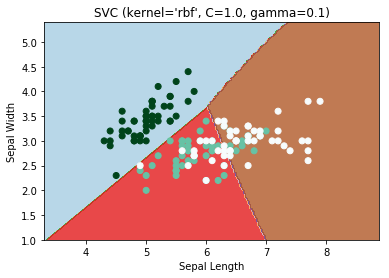

In [234]:
svc_iris_classifier(data, kernel="rbf", C=1.0, gamma=0.1)

This is nice and all, but how can we more accurately calculate the optimal SVC model? 

It would certainly help if there were numerical measures to determing the accuracy of a model, right?

Right?

# And now, tying it all together for prediction...

Let's put this all together.

After defining our training and testing Iris data, create your fitted model and run our `.predict()` and `.score()` methods.

In [238]:
X, y = data.data[:, :2], data.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

clf_svc_iris = SVC(kernel="linear", C=1.0, gamma="auto")
clf_svc_iris.fit(X_train, y_train)

y_pred = clf_svc_iris.predict(X_test)
clf_svc_iris.score(X_test, y_test)

0.78947368421052633

Our `y_pred` is of the same shape of our `y_test`, as expected, and our score is reasonable! 

So far, so good. 

Let's pull it all together one last time with a custom engineered pipeline.

## How can we ascertain the best model configuration? 

In [195]:
X, y = data.data[:, :2], data.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

possible_kernels = ["linear", "rbf"]
possible_Cs = [1.0, 10.0, 100.0, 1000.0]
possible_gammas = ["auto", 0.1, 1.0, 10.0, 100.0]

def get_tuned_SVC_score(kernel, C, gamma):
    clf = SVC(kernel=kernel, C=C, gamma=gamma)
    clf.fit(X_train, y_train)
    return clf.score(X_test, y_test)

clf_scores = list()
for kernel in possible_kernels:
    for C in possible_Cs:
        for gamma in possible_gammas:
            clf_scores.append((get_tuned_SVC_score(kernel=kernel, C=C, gamma=gamma), kernel, C, gamma))
       
rel_max, position = 0, 0
for index, item in enumerate(clf_scores):
    if item[0] > rel_max:
        rel_max = item[0]
        position = index
        
print("\nBEST SVM CLASSIFIER SCORE WITH DETAILS IS: \n\n - Score: {}\n - Kernel: '{}'\n - C: {}\n - Gamma: {}\n".format(clf_scores[position][0], clf_scores[position][1], clf_scores[position][2], clf_scores[position][3]))


BEST SVM CLASSIFIER SCORE WITH DETAILS IS: 

 - Score: 0.8421052631578947
 - Kernel: 'rbf'
 - C: 1.0
 - Gamma: 0.1



Above, we constructed some basic Python code to grab several model scores based on many differently tuned hyperparameters. 

This way, we can confidently say our SVM classifier is as optimized as we can tune it to be with what we currently have to work with. 

I encourage you to look into other hyperparameters surrounding SVMs and other ways you can optimize machine learning models, including cross-validation and other pipeline-related mechanics. 